In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv('economic_index.csv')

In [25]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2024,1,3.5,4.8,1448.70
1,2024,2,3.1,4.7,1457.10
2,2024,3,3.3,4.7,1467.67
3,2024,4,3.2,5.2,1484.37
4,2024,5,3.5,5.0,1491.48


In [26]:
df.drop(columns=["year","month"],axis=1,inplace=True)

In [27]:
df.head()

,interest_rate,unemployment_rate,index_price
0,3.5,4.8,1448.70
1,3.1,4.7,1457.10
2,3.3,4.7,1467.67
3,3.2,5.2,1484.37
4,3.5,5.0,1491.48


In [28]:
# check null values
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


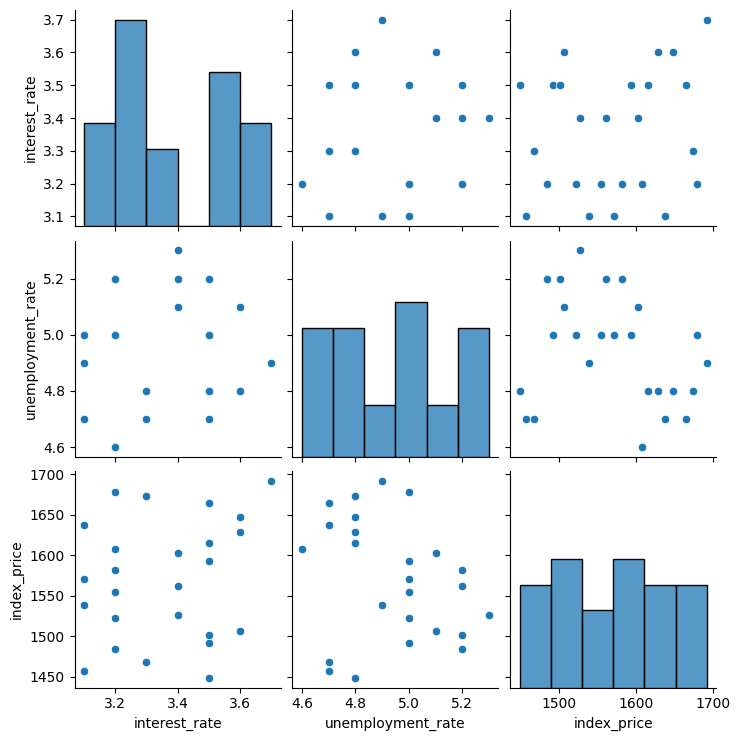

In [29]:
sns.pairplot(df)

In [30]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.061369,0.184664
unemployment_rate,0.061369,1.000000,-0.250003
index_price,0.184664,-0.250003,1.000000


Text(0.5, 1.0, 'umployment_rate vs interest_rate')

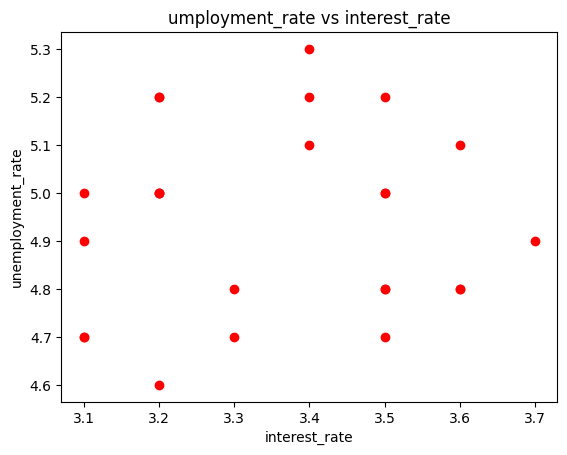

In [34]:
## visualize a datapoints more closely

plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")
plt.title("umployment_rate vs interest_rate")

In [35]:
# independent and depemdent feature

# x = df.index[['interest_rate','unemployment_rate']]  tradition method will use another method
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [36]:
x.head()

,interest_rate,unemployment_rate
0,3.5,4.8
1,3.1,4.7
2,3.3,4.7
3,3.2,5.2
4,3.5,5.0


In [38]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

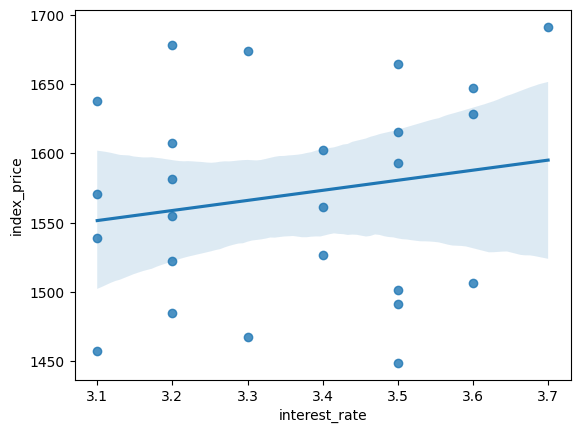

In [41]:
sns.regplot(x='interest_rate',y='index_price',data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

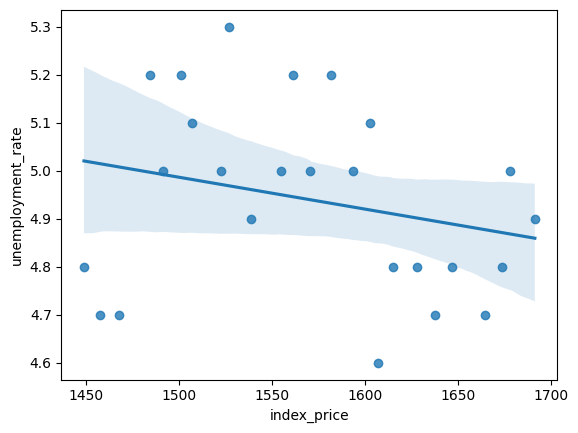

In [42]:
sns.regplot(x='index_price',y='unemployment_rate',data=df)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [48]:
x_train

array([[-1.47408695, -1.29354835],
       [-0.43355498, -0.69652603],
       [ 0.60697698,  1.69156322],
       [-0.43355498, -1.29354835],
       [-1.47408695,  0.4975186 ],
       [ 0.086711  ,  1.09454091],
       [-0.95382097,  1.69156322],
       [ 0.60697698,  0.4975186 ],
       [ 1.12724296, -0.69652603],
       [ 0.60697698, -0.69652603],
       [ 0.60697698, -1.29354835],
       [ 1.12724296, -0.69652603],
       [ 1.64750894, -0.09950372],
       [-0.95382097,  0.4975186 ],
       [-0.95382097,  0.4975186 ],
       [ 0.60697698,  0.4975186 ],
       [-1.47408695, -1.29354835],
       [ 1.12724296,  1.09454091]])

In [49]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [50]:
regression.fit(x_train,y_train)

LinearRegression()

In [52]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,x_train,y_train,scoring = 'neg_mean_squared_error',cv=5)

In [54]:
np.mean(validation_score)

np.float64(-6547.363725112455)

In [55]:
## prediction

y_pred = regression.predict(x_test)

In [56]:
y_pred

array([1559.80697894, 1604.9388029 , 1646.02627097, 1553.74576571,
       1572.60523823, 1544.31602945, 1528.14924712])

In [57]:
## performance matrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [58]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)

mse:  8365.739429795165
mae:  61.09867169495591
rmse:  91.46441619446966


In [59]:
from sklearn.metrics import r2_score

In [60]:
score = r2_score(y_test,y_pred)
print(score)

-0.9167421505217406


In [62]:
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

-1.875113225782611


# Assumptions

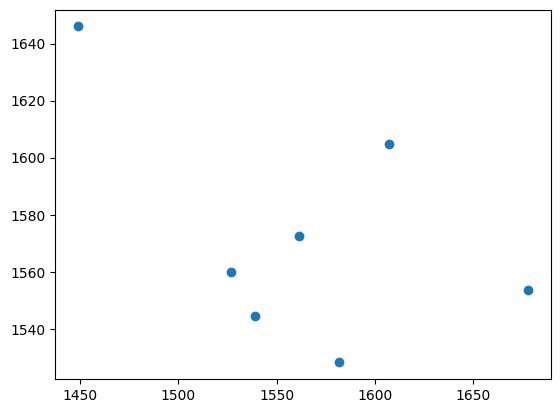

In [63]:
plt.scatter(y_test,y_pred)

In [64]:
resudials = y_test-y_pred
print(resudials)

8     -33.176979
16      2.351197
0    -197.326271
23    124.404234
11    -11.205238
9      -5.526029
13     53.700753
Name: index_price, dtype: float64


<Axes: xlabel='index_price', ylabel='Density'>

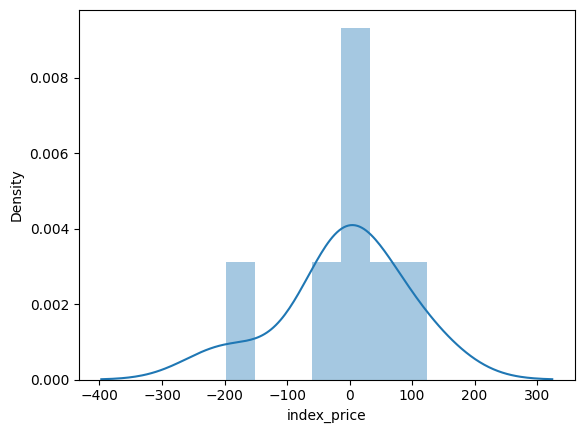

In [68]:
# plot this resudials

sns.distplot(resudials)

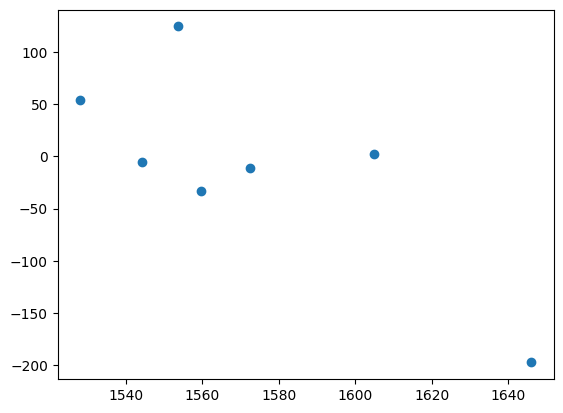

In [69]:
## scatter plot with respect to predctions and resudials

plt.scatter(y_pred,resudials)

In [70]:
# OLS Linear Regression
import statsmodels.api as sm


In [71]:
model = sm.OLS(y_train,x_train).fit()

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.124
Method:                 Least Squares   F-statistic:                           0.005351
Date:                Sun, 15 Jun 2025   Prob (F-statistic):                       0.995
Time:                        17:45:49   Log-Likelihood:                         -158.05
No. Observations:                  18   AIC:                                      320.1
Df Residuals:                      16   BIC:                                      321.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            30.1248    394.701      0.076      0.940    -806.603     866.853
x2           -29.8190    394.701     -0.076      0.941    -866.547     806.909
==============================================================================
Omnibus:                        1.606   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.328
Skew:                          -0.597   Prob(JB):                        0.515
Kurtosis:                       2.411   Cond. No.                         1.08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
print(regression.coef_)

[ 30.12475448 -29.81904175]


In [78]:
regression.predict(scaler.transform([[3.4, 5.2]]))

array([1520.16348143])